In [2]:
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import time
from matplotlib.collections import PatchCollection
%matplotlib inline

In [4]:
import cv2

In [5]:
# function to generate random dot positions at specified distance range from center
# def getNewDotPositions(dotNum, minDist=5*pixelsPerDegree, maxDist=90*pixelsPerDegree):
# def getNewDotPositions(dotNum, minDist=0, maxDist=1130):
# #     dists = np.random.uniform(minDist, maxDist, size=dotNum)
#     dists = np.random.randint(minDist, high=maxDist, size=dotNum)
#     angles = np.pi * np.random.uniform(0, 2, size=dotNum)
#     x = dists * np.cos(angles)
#     y = dists * np.sin(angles)
#     return np.stack([x,y]).T

def getNewDotPositions(dotNum):
    x = np.random.randint(0, high=screenWidth, size=dotNum)
    y = np.random.randint(0, high=screenHeight, size=dotNum)
    return np.stack([x,y]).T

In [68]:
960*2

1920

In [69]:
viewingDistance = 100
radius = 10
speed = 40#1
dotNum = 300
timePoints = 60#1000
pixelsPerDegree = 10/2 
screenWidth = 1920/2
screenHeight = 1200/2

In [76]:
#pick dots at random screen positions with respect to center point
# centerPos=np.array([-60*pixelsPerDegree,-20*pixelsPerDegree])
centerPos=np.array([0,0])
pos = getNewDotPositions(dotNum) + centerPos


In [77]:
#trying different method
posArray = np.empty((timePoints, dotNum, 2))
posArray[0,:,:] = pos
for i in range(1,timePoints):
    posArray[i,:,0] = posArray[i-1,:,0] + speed*pixelsPerDegree*1/60.
    posArray[i,:,1] = posArray[i-1,:,1]
    if any(np.abs(posArray[i,:,0])>screenWidth):
        repopInds = np.where(np.abs(posArray[i,:,0])>screenWidth)[0]
        posArray[i,repopInds,0] = 0#-1*posArray[i,repopInds,0]
        

In [78]:
dotColors = [0, 254]
dotColorAssignments = np.random.choice(dotColors, dotNum)

backgroundColor=127
im_array = []
for points in posArray:
    im = np.ones([screenHeight, screenWidth])*backgroundColor
    for p,c in zip(points, dotColorAssignments):
        
#         radius = np.min([dist, dist180])*self.scaleFactor
        radius = 8
        cv2.circle(im, tuple(np.round(p).astype(np.int)), int(radius), int(c), -1)
    im_array.append(im.astype(np.uint8))

In [ ]:
# saveDir = (r'/Volumes/Brain2018/Openscope_Motion/rotation_right_+'+str(dotNum)+'_'+str(speed)+'.npz')

# np.savez_compressed(saveDir, im_array=im_array)

In [79]:
test = np.array(im_array)

In [80]:
test.shape

(60, 600, 960)

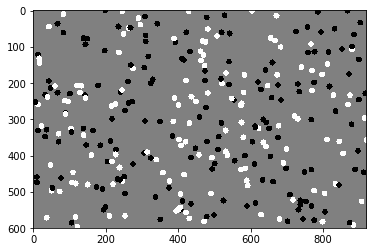

In [62]:
plt.imshow(test[26,:,:], cmap='gray')

In [237]:
test[0,:,:].mean()

126.40512847222222

In [238]:
(len(np.where(test[0,:,:]>127)[0])+len(np.where(test[0,:,:]<127)[0]))/float(len(np.where(test[0,:,:]==127)[0]))

0.10597379456536767

In [70]:
def make_Rotation(dotNum, speed, radius):
    centerPos=np.array([0,0])
    pos = getNewDotPositions(dotNum) + centerPos
    
    posArray = np.empty((timePoints, dotNum, 2))
    posArray[0,:,:] = pos
    for i in range(1,timePoints):
        posArray[i,:,0] = posArray[i-1,:,0] + speed*pixelsPerDegree*1/60.
        posArray[i,:,1] = posArray[i-1,:,1]
        if any(np.abs(posArray[i,:,0])>screenWidth):
            repopInds = np.where(np.abs(posArray[i,:,0])>screenWidth)[0]
            posArray[i,repopInds,0] = 0#-1*posArray[i,repopInds,0]
#             posArray[i,repopInds,0] = np.random.randint(-16, high=16, size=len(repopInds))
    
    dotColors = [0, 254]
    dotColorAssignments = np.random.choice(dotColors, dotNum)

    backgroundColor=127
    im_array = []
    for points in posArray:
        im = np.ones([screenHeight, screenWidth])*backgroundColor
        for p,c in zip(points, dotColorAssignments):

    #         radius = np.min([dist, dist180])*self.scaleFactor
#             radius = 8
            cv2.circle(im, tuple(np.round(p).astype(np.int)), int(radius), int(c), -1)
        im_array.append(im.astype(np.uint8))
    
    saveDir = (r'/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_'+str(dotNum)+'_'+str(speed)+'_'+str(radius))
    print saveDir
#     np.savez_compressed(saveDir, im_array=im_array)
    np.save(saveDir, im_array)
    
    test = np.array(im_array)
#     print test[0,:,:].mean()
#     print (len(np.where(test[0,:,:]>127)[0])+len(np.where(test[0,:,:]<127)[0]))/float(len(np.where(test[0,:,:]==127)[0]))

In [71]:
for dn in [300,545,1000]:
    for i in [200,400]:
        for r in [5,8,12]:
            make_Rotation(dotNum=dn, speed=i, radius=r)

/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_200_5
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_200_8
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_200_12
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_400_5
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_400_8
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_400_12
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_545_200_5
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_545_200_8
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/

In [72]:
# for i in [2,5,10,20,40,50,100,200]:
#     make_Rotation(dotNum=1750, speed=i)
    
for dn in [300,545,1000]:
    for i in [10,20,50,100]:#,200,400,800]:
        for r in [5,8,12]:
            make_Rotation(dotNum=dn, speed=i, radius=r)

/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_10_5
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_10_8
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_10_12
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_20_5
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_20_8
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_20_12
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_50_5
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_50_8
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles

In [323]:
2*3*3*6

108

In [249]:
make_Rotation(dotNum=1750, speed=40)

/Volumes/Brain2018/Openscope_Motion/rotation_right_+1750_40.npz
126.447461806
0.807104178301


In [73]:
def make_Rotation_left(dotNum, speed, radius):
    centerPos=np.array([0,0])
    pos = getNewDotPositions(dotNum) + centerPos
    
    posArray = np.empty((timePoints, dotNum, 2))
    posArray[0,:,:] = pos
    for i in range(1,timePoints):
        posArray[i,:,0] = posArray[i-1,:,0] - speed*pixelsPerDegree*1/60.
        posArray[i,:,1] = posArray[i-1,:,1]
        if any(posArray[i,:,0]<0):
            repopInds = np.where(posArray[i,:,0]<0)[0]
            posArray[i,repopInds,0] = screenWidth#-1*posArray[i,repopInds,0]
#             posArray[i,repopInds,0] = np.random.randint(screenWidth-16, high=screenWidth+16, size=len(repopInds))
    
    dotColors = [0, 254]
    dotColorAssignments = np.random.choice(dotColors, dotNum)

    backgroundColor=127
    im_array = []
    for points in posArray:
        im = np.ones([screenHeight, screenWidth])*backgroundColor
        for p,c in zip(points, dotColorAssignments):

    #         radius = np.min([dist, dist180])*self.scaleFactor
#             radius = 8
            cv2.circle(im, tuple(np.round(p).astype(np.int)), int(radius), int(c), -1)
        im_array.append(im.astype(np.uint8))
    
    saveDir = (r'/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_'+str(dotNum)+'_'+str(speed)+'_'+str(radius)+'.npy')
    print saveDir
#     np.savez_compressed(saveDir, im_array=im_array)
    np.save(saveDir, im_array)
    
    test = np.array(im_array)
#     print test[0,:,:].mean()
#     print (len(np.where(test[0,:,:]>127)[0])+len(np.where(test[0,:,:]<127)[0]))/float(len(np.where(test[0,:,:]==127)[0]))

In [75]:
for dn in [300,545,1000]:
    for i in [200,400]:
        for r in [5,8,12]:
            make_Rotation_left(dotNum=dn, speed=i, radius=r)


/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_200_5.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_200_8.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_200_12.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_400_5.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_400_8.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_400_12.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_545_200_5.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_545_200_8.npy
/Volumes/programs/braintv/workgroups/nc-ophys/

In [74]:
for dn in [300,545,1000]:
    for i in [10,20,50,100]:
        for r in [5,8,12]:
            make_Rotation_left(dotNum=dn, speed=i, radius=r)


/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_10_5.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_10_8.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_10_12.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_20_5.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_20_8.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_20_12.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_50_5.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_left_300_50_8.npy
/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/o

In [83]:
temp = np.load(r'/Volumes/programs/braintv/workgroups/nc-ophys/Saskia/openscope_motion/npyfiles_final_final/rotation_right_300_20_5.npy')

In [84]:
temp.shape

(60, 600, 960)

In [256]:
def make_Rotation_down(dotNum, speed):
    centerPos=np.array([0,0])
    pos = getNewDotPositions(dotNum) + centerPos
    
    posArray = np.empty((timePoints, dotNum, 2))
    posArray[0,:,:] = pos
    for i in range(1,timePoints):
        posArray[i,:,1] = posArray[i-1,:,1] - speed*pixelsPerDegree*1/60.
        posArray[i,:,0] = posArray[i-1,:,0]
        if any(np.abs(posArray[i,:,1])<0):
            repopInds = np.where(np.abs(posArray[i,:,1])<0)[0]
            posArray[i,repopInds,0] = screenHeight#-1*posArray[i,repopInds,0]
    
    dotColors = [0, 254]
    dotColorAssignments = np.random.choice(dotColors, dotNum)

    backgroundColor=127
    im_array = []
    for points in posArray:
        im = np.ones([screenHeight, screenWidth])*backgroundColor
        for p,c in zip(points, dotColorAssignments):

    #         radius = np.min([dist, dist180])*self.scaleFactor
            radius = 8
            cv2.circle(im, tuple(np.round(p).astype(np.int)), int(radius), int(c), -1)
        im_array.append(im.astype(np.uint8))
    
    saveDir = (r'/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+'+str(dotNum)+'_'+str(speed)+'.npy')
    print saveDir
#     np.savez_compressed(saveDir, im_array=im_array)
    np.save(saveDir, im_array)
    
    test = np.array(im_array)
    print test[0,:,:].mean()
    print (len(np.where(test[0,:,:]>127)[0])+len(np.where(test[0,:,:]<127)[0]))/float(len(np.where(test[0,:,:]==127)[0]))

In [257]:
for dn in [145,300,545,1000,1750]:
    for i in [2,5,10,20,40,50,100,200]:
        make_Rotation_down(dotNum=dn, speed=i)

/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+145_2.npy
126.177586806
0.0504163368919
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+145_5.npy
126.958989583
0.0488555456416
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+145_10.npy
127.283104167
0.0507574209743
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+145_20.npy
126.768269097
0.0502611977718
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+145_40.npy
127.749652778
0.0506424240655
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+145_50.npy
127.589579861
0.0505887674551
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+145_100.npy
127.113550347
0.0505791864942
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+145_200.npy
126.018175347
0.050701835992
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+300_2.npy
128.173206597
0.106443303425
/Volumes/Brain2018/Openscope_Motion/npyfiles/rotation_down_+300_5.npy
127.079815972
0.10736861

In [ ]:
#radius 
2.5 degree X 5 pixels/degree 

In [265]:
2.5*5

12.5

In [266]:
1.5*5

7.5

In [267]:
1*5

5

In [314]:
def test_Rotation_left(dotNum, speed, radius):
    centerPos=np.array([0,0])
    pos = getNewDotPositions(dotNum) + centerPos
    
    posArray = np.empty((timePoints, dotNum, 2))
    posArray[0,:,:] = pos
    for i in range(1,timePoints):
        posArray[i,:,0] = posArray[i-1,:,0] - speed*pixelsPerDegree*1/60.
        posArray[i,:,1] = posArray[i-1,:,1]
        if any(posArray[i,:,0]<0):
            repopInds = np.where(posArray[i,:,0]<0)[0]
#             print len(repopInds)
            posArray[i,repopInds,0] = screenWidth#-1*posArray[i,repopInds,0]
            posArray[i,repopInds,0] = np.random.randint(screenWidth-16, high=screenWidth+16, size=len(repopInds))
    return posArray

In [308]:
len(repopInds)

array([280])

In [307]:
np.random.randint(screenWidth-8, high=screenWidth+8,)

600

In [315]:
posArray = test_Rotation_left(dotNum=300, speed=400, radius=5)

In [311]:
posArray.shape

(70, 300, 2)

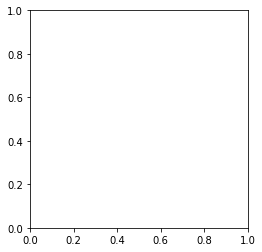

A Jupyter Widget

In [316]:
from ipywidgets import widgets, interact, interactive
from IPython.display import display
from IPython.display import Image

scaleFactor = 1/20.
fig, ax = plt.subplots()
ax.set_aspect('equal')
def f(x=0):
    patches = []
    for p in posArray[x]:
#         dist = ((p[0] - centerPos[0])**2 + (p[1]-centerPos[1])**2)**0.5
        radius = 200*scaleFactor
        patches.append(matplotlib.patches.Circle((p[0], p[1]), radius=radius, ec=[0,0,0], fc=[0,0,0]))
#         ax.add_artist(matplotlib.patches.Circle((p[0], p[1]), radius=radius, ec=[0,0,0], fc=[0,0,0]))
    
    collection = PatchCollection(patches)
    ax = plt.gca()
    ax.set_aspect('equal')
#     ax.add_collection(collection)
    for p in patches:
        ax.add_artist(p)
#     ax.set_ylim([-45, 45])
#     ax.set_xlim([-70, 70])
#         ax.set_ylim([-45*pixelsPerDegree, 45*pixelsPerDegree])
#         ax.set_xlim([-70*pixelsPerDegree, 70*pixelsPerDegree])
        ax.set_ylim([0, 90*pixelsPerDegree])
        ax.set_xlim([0, 140*pixelsPerDegree])

#     ax.axis('off')
    
interact(f, x=(0,timePoints-1,1));

In [325]:
168*2

336

In [326]:
60*60

3600

In [327]:
3600/336.

10.714285714285714

In [328]:
3600/168.

21.428571428571427

### Build sequence

- 72 translation conditions
- 108 rotation conditions
- 2 second sweeps


In [467]:
arr = np.mod(range(1800), 180)
np.random.shuffle(arr)
arr

array([111, 173, 102, ...,  98,  90,  42])

In [469]:
ds_dict_2 = {}
for i in range(180):
    ds = []
    ds_start = np.where(arr==i)[0]
    for st in ds_start:
        ds.append((st*2, (st*2)+1))
    ds_dict_2[str(i)] = ds

In [470]:
with open(r'/Users/saskiad/openscope_motion/stimulus/ds_dict_two.pkl', 'wb') as f:
    pickle.dump(ds_dict_2, f)

In [451]:
arr2 = np.mod(range(1800), 180)
np.random.shuffle(arr2)
arr2

array([112, 133, 105, ...,  44,  58,  93])

In [468]:
i=178
print np.where(arr==i)[0]

[  23  212  558  666  759  780  842 1194 1286 1459]


In [463]:
ds_dict = {}
for i in range(180):
    ds = []
    ds_start = np.where(arr2==i)[0]
    for st in ds_start:
        ds.append((st*2, (st*2)+1))
    ds_dict[str(i)] = ds

In [465]:
ds_dict['173']

[(142, 143),
 (198, 199),
 (308, 309),
 (758, 759),
 (762, 763),
 (1496, 1497),
 (1546, 1547),
 (2656, 2657),
 (3196, 3197),
 (3558, 3559)]

In [375]:
np.save(r'/Users/saskiad/openscope_motion/stimulus/ds_dict_one.npy',ds_dict)

In [379]:
import cPickle as pickle

In [466]:
with open(r'/Users/saskiad/openscope_motion/stimulus/ds_dict_one.pkl', 'wb') as f:
    pickle.dump(ds_dict, f)

In [471]:
with open(r'/Users/saskiad/openscope_motion/stimulus/ds_dict_one.pkl', 'rb') as f:
    temp = pickle.load(f)

In [474]:
temp['178']

[(236, 237),
 (460, 461),
 (520, 521),
 (540, 541),
 (604, 605),
 (660, 661),
 (1316, 1317),
 (1374, 1375),
 (2358, 2359),
 (2640, 2641)]

In [476]:
with open(r'/Users/saskiad/openscope_motion/stimulus/ds_dict_two.pkl', 'rb') as f:
    temp2 = pickle.load(f)

In [478]:
temp2['178']

[(46, 47),
 (424, 425),
 (1116, 1117),
 (1332, 1333),
 (1518, 1519),
 (1560, 1561),
 (1684, 1685),
 (2388, 2389),
 (2572, 2573),
 (2918, 2919)]

In [496]:
ds_dict['0'][2][0]

816

In [501]:
start_times = []
for key in ds_dict.keys():
    for a in ds_dict[key]:
        start_times.append(a[0])

In [502]:
temp = np.array(start_times).sort()

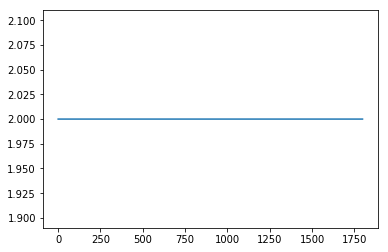

In [506]:
plt.plot(np.ediff1d(np.sort(np.array(start_times))))

### making ds for checkerboard stimulus where each trial is a different length

five conditions, length 1,2,4,8,10

In [400]:
stim = ['a','b','c','d','e']
trial_length = [1,2,4,8,10]

In [403]:
for (stimname, length) in zip(stim, trial_length):
    print stimname, length

a 1
b 2
c 4
d 8
e 10


In [432]:
np.array(trial_length).sum() + (36*2)

269.5

In [433]:
3600/269.5

13.358070500927644

In [434]:
36*12

432

In [435]:
arr3 = np.mod(range(0,432),36)
np.random.shuffle(arr3)
arr3

array([ 3, 14,  1, 13, 27,  9, 12, 15, 13, 15, 19, 32,  7,  5, 31, 22, 10,
       27, 32, 29, 24,  8, 26, 10, 27,  0, 30,  3, 26,  5, 33,  9,  3,  7,
       12, 33,  8, 17, 33, 14, 15,  9, 26, 22, 11, 10, 28, 13, 10, 19, 33,
        8, 16, 23, 17, 19,  2, 10, 13, 16, 23, 26,  9, 14, 23, 15, 18, 29,
       29, 25, 11, 21,  7,  0,  6, 22, 24, 29,  6, 31, 16, 24, 20, 20, 30,
        6, 19,  2, 17,  2,  8, 22, 20,  1, 13, 25, 12, 30, 27, 18,  1, 29,
       25,  3, 16, 31, 20,  3,  3, 25, 24,  2, 14, 25, 31, 35, 17, 28, 25,
        2, 18,  6, 10, 16,  2, 26, 27, 35, 24, 30,  8,  2,  9,  4, 12, 12,
        1,  5, 13, 24,  0, 33,  5, 27, 17, 24,  0, 19, 12, 28,  5, 24, 34,
       33, 29,  5, 15, 26, 34, 35, 20,  4, 17, 18, 28, 15,  5,  7, 16, 22,
       21, 18, 30, 20, 30, 16, 16, 22, 13, 14, 27, 10, 26, 12,  3, 28, 13,
        4, 35, 25, 18, 18,  7, 27, 20, 23, 21, 28,  3, 23, 30,  9, 17, 22,
        2, 20, 12,  0, 24, 21, 20, 11, 26,  6, 31, 29, 35, 17, 21, 21,  6,
       27, 12,  0, 16, 30

In [437]:
len(np.where(arr3==23)[0])

12

In [423]:
trial_length = [2, 8.4, 8.4, 2.4, 2.4, 8.8, 8.8, 2.5, 2.5, 8.2, 8.4, 2.4, 2.4, 8.8,2.5,2.5,8.2, 8.4, 2.4, 2.4, 8.8, 2.5, 2.5, 2.4, 8.4, 8.4, 2.4, 8.8, 8.8, 2.5, 2.4, 8.4, 8.4, 2.4, 8.8, 8.8]

In [438]:
ds_dict = {k: [] for k in range(36)}
timepoint = 0
for a in arr3:
    ds_dict[a].append((timepoint, timepoint+trial_length[a]))
    timepoint += trial_length[a] + 2
    

In [439]:
ds_dict[0]

[(196.90000000000006, 198.90000000000006),
 (505.49999999999966, 507.49999999999966),
 (1076.1999999999987, 1078.1999999999987),
 (1126.9999999999989, 1128.9999999999989),
 (1576.9000000000005, 1578.9000000000005),
 (1697.3000000000009, 1699.3000000000009),
 (1775.9000000000015, 1777.9000000000015),
 (2475.9000000000074, 2477.9000000000074),
 (2657.000000000009, 2659.000000000009),
 (2697.1000000000095, 2699.1000000000095),
 (2855.8000000000106, 2857.8000000000106),
 (3194.1000000000145, 3196.1000000000145)]

In [440]:
ds_dict[1]

[(8.9, 17.3),
 (673.6999999999992, 682.0999999999992),
 (729.299999999999, 737.699999999999),
 (1033.7999999999986, 1042.1999999999987),
 (1720.300000000001, 1728.7000000000012),
 (1790.3000000000015, 1798.7000000000016),
 (2012.6000000000029, 2021.000000000003),
 (2056.000000000003, 2064.4000000000033),
 (2676.3000000000093, 2684.7000000000094),
 (2796.40000000001, 2804.80000000001),
 (2877.600000000011, 2886.000000000011),
 (3202.6000000000145, 3211.0000000000146)]

In [441]:
ds_dict[2]

[(394.09999999999985, 402.49999999999983),
 (622.6999999999994, 631.0999999999993),
 (643.4999999999993, 651.8999999999993),
 (819.9999999999989, 828.3999999999988),
 (898.0999999999987, 906.4999999999986),
 (944.2999999999986, 952.6999999999986),
 (999.9999999999984, 1008.3999999999984),
 (1551.3000000000004, 1559.7000000000005),
 (1988.9000000000026, 1997.3000000000027),
 (2430.500000000007, 2438.900000000007),
 (2636.400000000009, 2644.8000000000093),
 (2982.700000000012, 2991.100000000012)]

In [442]:
ds_dict[3]

[(0, 2.4),
 (205.30000000000007, 207.70000000000007),
 (239.50000000000009, 241.9000000000001),
 (754.599999999999, 756.999999999999),
 (790.399999999999, 792.7999999999989),
 (794.7999999999989, 797.1999999999989),
 (1406.7999999999997, 1409.1999999999998),
 (1513.0, 1515.4),
 (1921.3000000000022, 1923.7000000000023),
 (1984.5000000000025, 1986.9000000000026),
 (2096.5000000000036, 2098.9000000000037),
 (2993.100000000012, 2995.5000000000123)]

In [443]:
ds_dict[4]

[(1020.5999999999984, 1022.9999999999984),
 (1243.599999999999, 1245.999999999999),
 (1432.7999999999997, 1435.1999999999998),
 (1836.8000000000018, 1839.2000000000019),
 (1862.400000000002, 1864.800000000002),
 (2003.8000000000027, 2006.2000000000028),
 (2008.2000000000028, 2010.6000000000029),
 (2400.4000000000065, 2402.8000000000065),
 (2467.0000000000073, 2469.4000000000074),
 (2539.400000000008, 2541.800000000008),
 (2554.200000000008, 2556.600000000008),
 (3073.000000000013, 3075.4000000000133)]

In [444]:
with open(r'/Users/saskiad/openscope_motion/stimulus/ds_dict_checkerboard.pkl', 'wb') as f:
    pickle.dump(ds_dict, f)

In [508]:
with open(r'/Users/saskiad/openscope_motion/stimulus/ds_dict_checkerboard.pkl', 'rb') as f:
    temp = pickle.load(f)

In [509]:
temp.keys()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]